In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")

from qiskit.tools.visualization import plot_histogram
from noisyopt import minimizeCompass
import matplotlib.pyplot as plt
import numpy as np
import random
import json

import sys
sys.path.append("..")
from qenv import Denoiser2

key_path = "../res/qiskit_apikey.json"
with open(key_path, "r") as f:
    APIkey = json.load(f)["key"]

In [2]:
n_qubits = 2
denoiser = Denoiser2(n_qubits, APIkey)
out = denoiser.get_dist([1, 0, 0, 0], [(0, 0, 0), (0, 0, 0)])

In [5]:
def func(Theta, x, n=1):
    res = [np.array(denoiser.get_dist(x, [(Theta[0], Theta[1], Theta[2]), (Theta[3], Theta[4], Theta[5])], shots=1)) for i in range(n)]
    return res


xx = np.eye(2 ** n_qubits)


def Los2(Theta):
    return sum(
        np.linalg.norm(func(Theta, xx[i]) - xx[i]) for i in range(2 ** n_qubits - 1)
    )


def Los3(test):
    return Los2([0, 0, test, 0, 0, 0])


res = minimizeCompass(
    Los3, x0=[1], bounds=[[-np.pi, np.pi]], deltatol=0.1, paired=False
)

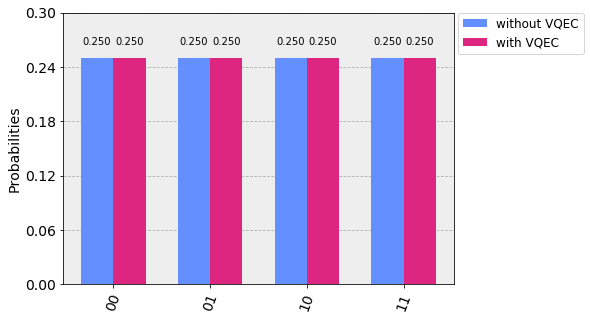

In [15]:
a = {
    "00": func([0, 0, 0, 0, 0, 0], [1, 0, 0, 0])[0][0],
    "01": func([0, 0, 0, 0, 0, 0], [0, 1, 0, 0])[0][1],
    "10": func([0, 0, 0, 0, 0, 0], [0, 0, 1, 0])[0][2],
    "11": func([0, 0, 0, 0, 0, 0], [0, 0, 0, 1])[0][3],
}
b = {
    "00": func([0, 0, res.x[0], 0, 0, 0], [1, 0, 0, 0])[0][0],
    "01": func([0, 0, res.x[0], 0, 0, 0], [0, 1, 0, 0])[0][1],
    "10": func([0, 0, res.x[0], 0, 0, 0], [0, 0, 1, 0])[0][2],
    "11": func([0, 0, res.x[0], 0, 0, 0], [0, 0, 0, 1])[0][3],
}

legend = ["without VQEC", "with VQEC"]
plot_histogram([a, b], legend=legend)

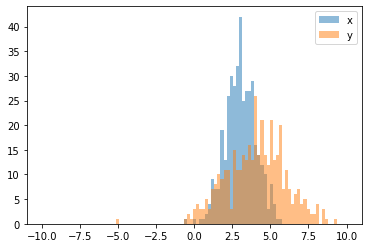

In [17]:
a = {
    "00": func([0, 0, 0, 0, 0, 0], [1, 0, 0, 0])[0][0],
    "01": func([0, 0, 0, 0, 0, 0], [1, 0, 0, 0])[0][1],
    "10": func([0, 0, 0, 0, 0, 0], [1, 0, 0, 0])[0][2],
    "11": func([0, 0, 0, 0, 0, 0], [1, 0, 0, 0])[0][3],
}
b = {
    "00": func([0, 0, res.x[0], 0, 0, 0], [1, 0, 0, 0])[0][0],
    "01": func([0, 0, res.x[0], 0, 0, 0], [1, 0, 0, 0])[0][1],
    "10": func([0, 0, res.x[0], 0, 0, 0], [1, 0, 0, 0])[0][2],
    "11": func([0, 0, res.x[0], 0, 0, 0], [1, 0, 0, 0])[0][3],
}

legend = ["without VQEC", "with VQEC"]
plot_histogram([a, b], legend=legend)

x = [random.gauss(3, 1) for _ in range(400)]
y = [random.gauss(4, 2) for _ in range(400)]
bins = np.linspace(-10, 10, 100)

plt.hist(x, bins, alpha=0.5, label="x")
plt.hist(y, bins, alpha=0.5, label="y")
plt.legend(loc="upper right")
plt.show()